In [1]:
# Print Images List
from skimage import io
import matplotlib.patches as mpatches
from skimage.feature import blob_dog, blob_log, blob_doh, canny
from skimage.morphology import binary_dilation, binary_erosion
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.morphology import erosion, dilation, opening, closing
from math import sqrt
from skimage.io import imread, imshow
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from skimage.exposure import histogram
from skimage.color import rgb2gray
from skimage.filters import gaussian


def show_images(images, titles=None):
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


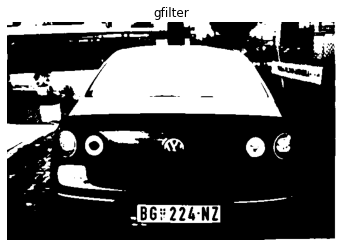

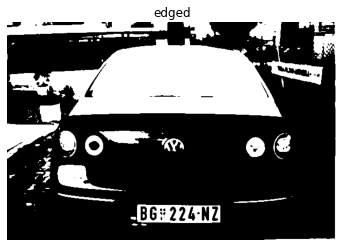

In [2]:
img=io.imread("closeCars/test.jpg")
gray=rgb2gray(img)
gfilter = gaussian(gray)
gfilter[gfilter<0.5]=0
gfilter[gfilter>0.5]=1
show_images([gfilter],['gfilter'])
edged=canny(gfilter)
show_images([gfilter],['edged'])

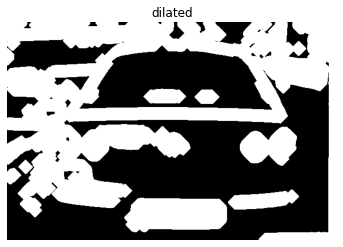

In [3]:
dilated=edged.copy()
for i in range(12):
    dilated=dilation(dilated)
show_images([dilated],['dilated'])

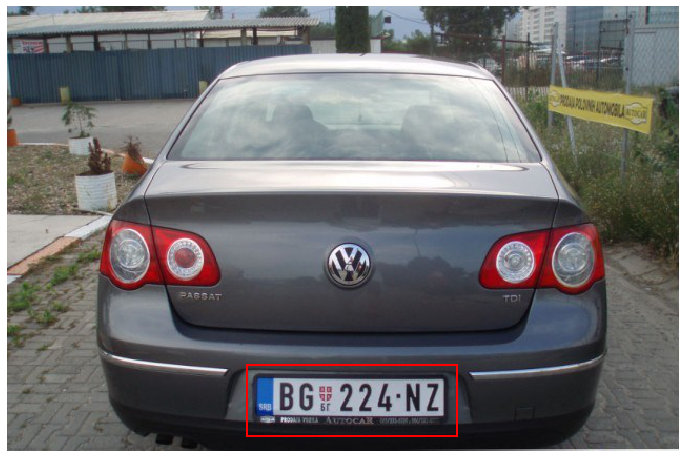

In [4]:
label_im = label(dilated)
fig, ax = plt.subplots(figsize=(10, 100))
imshow(img)
for i in regionprops(label_im):
    minr, minc, maxr, maxc = i.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)
ax.set_axis_off()
plt.show()